<a href="https://colab.research.google.com/github/singhhimanshu600/Cardivascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction.

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**           Himanshu

heart-attack-heart-disease-concept-with-health-care-medicine_44282-213.avif

# **Project Summary -**

# Cardiovascular Heart Disease (CHD) is a medical condition that affects the heart and blood vessels, and it is one of the leading causes of morbidity and mortality worldwide. Developing a classification machine learning model for CHD can be crucial in predicting and diagnosing the risk of this condition, allowing for early intervention and personalized treatment plans.

The goal of the classification ML model is to predict whether an individual is at a high risk or low risk of developing CHD based on various input features or risk factors. These risk factors may include demographic information (age, gender), lifestyle choices (smoking, physical activity), medical history (blood pressure, cholesterol levels), and genetic predisposition, among others.

###In this project, I am going to make a machine learning model that can predict after ten years whether the patient will have CHD or not with the best accuracy. I have the dataset from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.


###The classification goal is to predict whether the patient has a ten-year risk of future coronary heart disease (CHD). The dataset provides the patient's information. It includes 3390 records with 17 attributes. Each attribute is a potential risk factor. There are both demographic, and medical risk factors.

# GitHub Link--https://github.com/singhhimanshu600



# **Problem Statement**

**Our goal is to predict whether the patients has a ten year risk of future coronary heart disease (CHD) or not.This datset includes 3390 records with 17 attributes. Each attribute is a potential risk factor. There are both demographic, and medical risk factor.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries for manipulation and analysis
import numpy as np
import pandas as pd

#importing library for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
import missingno as msno

# Imported scikit learn for model training, model optimization, and metrics calculation.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, roc_auc_score

# To ignore warnings if any.
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
# drive mounting.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset.
dataset = pd.read_csv('/content/drive/MyDrive/almabetter projects data/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look.
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count.
dataset.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count.
duplicate = len(dataset[dataset.duplicated()])
print("Duplicate Rows:", duplicate)

Duplicate Rows: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count.
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

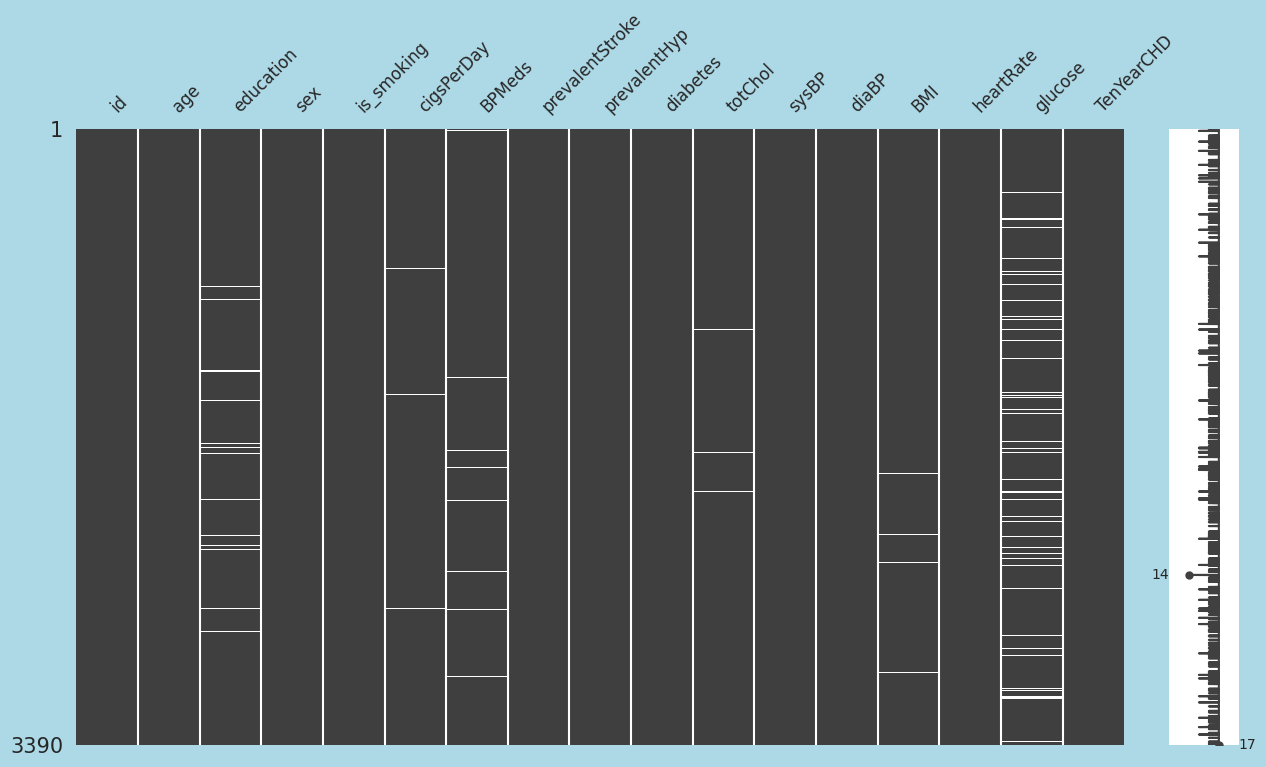

In [9]:
# Visualizing the missing values.
msno.matrix(dataset, figsize = (15,8), fontsize =(12))

### What did you know about your dataset?

This dataset contains 3390 observation with 17 attributes. It has some categorical and continuous features. It also consist some null values in seven columns. Namely education, cigrattes per day, BP medication, total cholestrol, BMI and glucose. Heart rate has only one null values.

In [10]:
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## ***2. Understanding Your Variables***

###**Variable Description**

**id :-** unique identification of the patients.

**age :-** Patient age.

**education :-** Education of the patients.

**sex :-** Gender.

**is_smoking :-** Whether the patient is currently smoking or not.

**cigsPerDay :-** Cigrattes smoked per day.

**BPMeds :-** Whether taking BP meds or not.

**prevelantStroke :-** If the patient has a history of stroke.

**prevalentHyp :-** If the patient has a history of hypertension.

**diabetes :-** Patient has diabetes or not.

**totChol :-** Total cholesterol measure.

**sysBP :-** BP measure.

**diaBP :-** BP measure.

**BMI :-** Body mass index.

**heartRate :-** Heart rate measure.

**glucose :-** Blood glucose or blood sugar level in miligram per decilitere.

**TenYearCHD :-** After ten years the patient will have the coronary heart disease or not.

###**Target Variable :-** TenYearCHD

In [11]:
# Dataset Columns.
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [12]:
# Dataset Describe.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


In [13]:

# description of categorical columns.
dataset.describe(include = 'object').T

,count,unique,top,freq
sex,3390,2,F,1923
is_smoking,3390,2,NO,1703


### Unique Values for each variable.

In [14]:
# Unique Values for each variable.
dataset.apply(lambda x: x.unique())

id                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
age                [64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5...
education                                  [2.0, 4.0, 1.0, 3.0, nan]
sex                                                           [F, M]
is_smoking                                                 [YES, NO]
cigsPerDay         [3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,...
BPMeds                                               [0.0, nan, 1.0]
prevalentStroke                                               [0, 1]
prevalentHyp                                                  [0, 1]
diabetes                                                      [0, 1]
totChol            [221.0, 212.0, 250.0, 233.0, 241.0, 272.0, 238...
sysBP              [148.0, 168.0, 116.0, 158.0, 136.5, 182.0, 232...
diaBP              [85.0, 98.0, 71.0, 88.0, 121.0, 136.0, 68.0, 7...
BMI                [nan, 29.77, 20.35, 28.26, 26.42, 32.8, 24.83,...
heartRate          [90.0, 72.0, 88

## 3. ***Data Wrangling***

In [15]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [16]:
# copy of the dataset.
data = dataset.copy()

In [17]:
# shape.
data.shape

(3390, 17)

###Data Cleaning.

In [18]:
# droping the useless column.
data.drop('id', axis = 1, inplace = True)

In [19]:
# column with total null values.
data.isnull().sum()[data.isnull().sum()>0]


education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64

In [20]:
# Total null values present in the dataset.
data.isnull().sum().sum()

510

In [21]:
# function to fill the null values in categorical columns.
def fillnull(df, columns):
  '''functuion to fill the null values in categorical columns'''
  for col in columns:
    df[col]=df[col].fillna(df[col].mode()[0])

In [22]:
# filling the null values in categorical columns.
fillnull(df = data, columns = ['education', 'BPMeds'])

In [23]:
# function to fill the continuous columns.
def FillNan(df, columns):
  '''function to fill the nan values in continuous variable'''
  for col in columns:
    data[col]=data[col].fillna(data[col].median())

In [24]:
# filling the nan values of continuous columns.
FillNan(df = data, columns = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose'])

In [25]:
data.isnull().sum().sum()

0

In [26]:
# checking wether the person is smoking but there is no any cigrattes per day mentioned.
data.loc[(data['is_smoking'] == 'YES') & (data['cigsPerDay'] == 0), ['is_smoking', 'cigsPerDay']]

,is_smoking,cigsPerDay
422,YES,0.0
466,YES,0.0
469,YES,0.0
491,YES,0.0
538,YES,0.0
767,YES,0.0
1461,YES,0.0
1467,YES,0.0
1597,YES,0.0
1986,YES,0.0


In [27]:
# count of missfilled row.
len(data.loc[(data['is_smoking'] == 'YES') & (data['cigsPerDay'] == 0)])

22

In [28]:
# checking wether the person is not smoking but the numbner of cigrattes cigrattes per day mentioned.
len(data[(data['is_smoking']=='NO') & (data['cigsPerDay'] > 0)])

0

In [29]:
# value counts of is_smoking column.
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [30]:
# rectifying the mistakes.
data.loc[(data['is_smoking'] == 'YES') & (data['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

In [31]:
# Let's check the value counts again.
data['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64



### What all manipulations have you done and insights you found?

### I made a copy of the original dataset for further processing. There was a mistake in the data the observation in is_smoking column was yes but the number of cigarettes per day was 0 in the same observation of some particular patients. So I rectified them by assigning the "NO" value in is_ smoking column where the number of cigarettes per day is 0.

### Apart from that, I dropped the "id" column because it's not going to help us with any machine learning algorithm or in EDA. I also filled the null values in the categorical column with their mode and the continuous column with their median.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [32]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

##**Univariate Analysis**

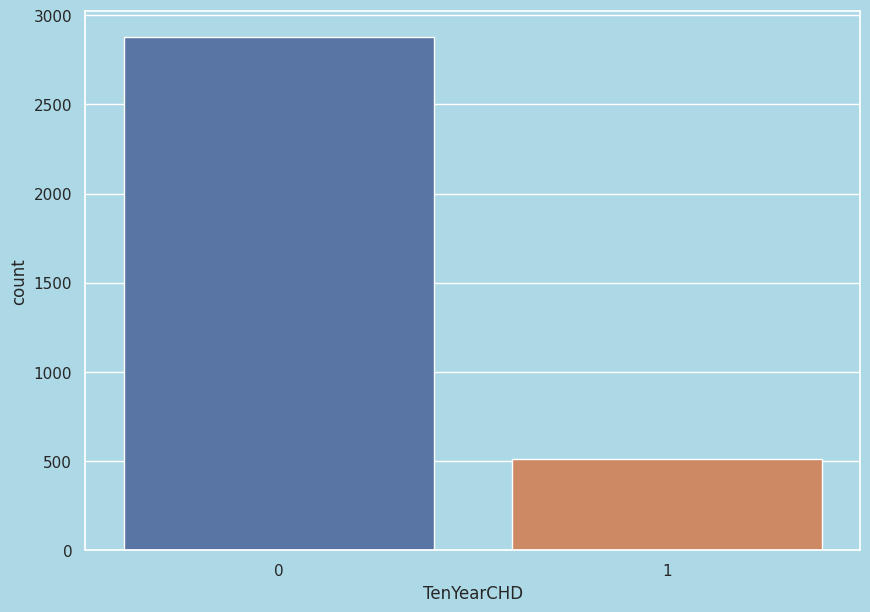

In [33]:
# distribution of target variable.
plt.figure(figsize = (10, 7))
sns.countplot(x='TenYearCHD', data = data)
plt.show()

###I wanted to see the distribution of the dependent variable, so I chose the count plot here. Countplot gives the best visualization when it comes to seeing the count of the variable finite values.

###As we can see in the above count plot that there are approximately 3000 patients who have not the risk of coronary heart disease in ten years. Besides that almost 500 patients have the risk of it.

In [34]:
# categorical features.
categorical_features = ['education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes',
         'TenYearCHD']

In [35]:
# continuous features.
continuous_features = ['age', 'cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

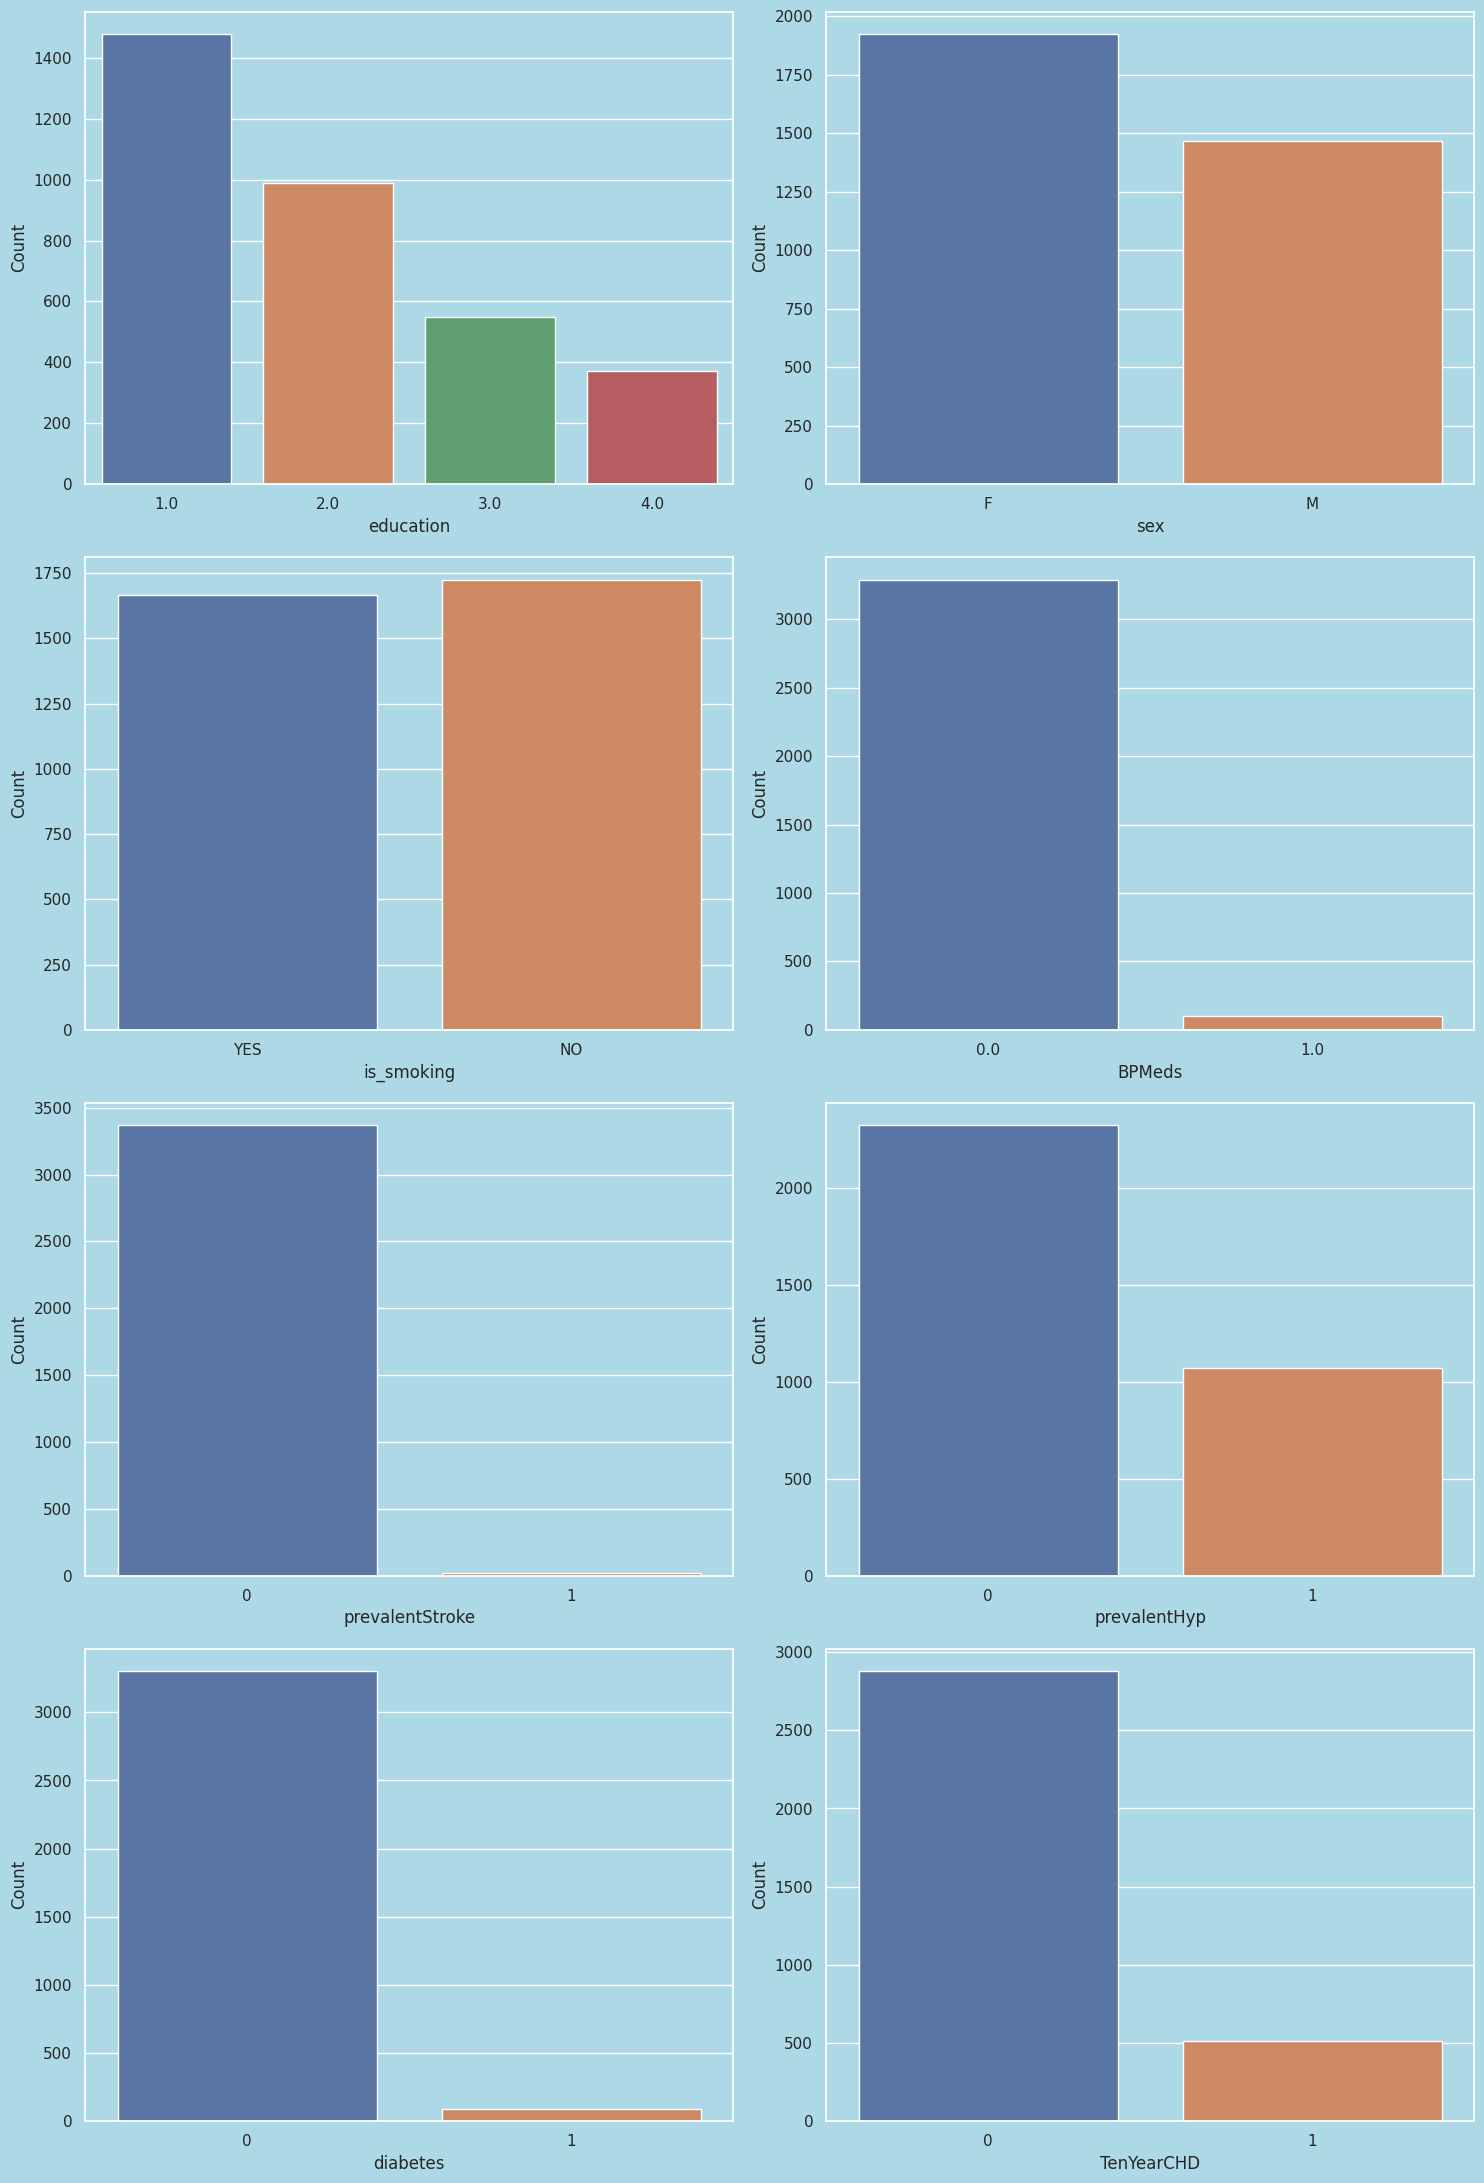

In [36]:
plt.figure(figsize=(15, 22))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=feature, data=data)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


I picked countplot here also because as we now it gives the best visualization with count of the varibale values.

**Insights found :-**

🟠 education : - Most peoples are having only class 1.0 education whereas only few patients has education of class 4.0 we can see the actual numbers below.

1.0 ---    1478

2.0 ---    990

3.0  ---   549

4.0  ---   373

🟠 sex : - In this data 1923 female and 1467 male.

🟠 is_smoking :- Almost half of the total residents is smoking.

🟠 BPMeds :- Less than 200 residents are on BP medication.

🟠 prevalentStroke :- Rare patient has the history of prevalent stroke.

🟠 prevalenthyp :- Almost 1000 residents has the history of prevalent hypertension.

🟠 diabetes :- Less than 300 resident has diabetes.

🟠 TenYearCHD :- Almost 500 residents has the risk of coronary heart disease.

<Axes: >

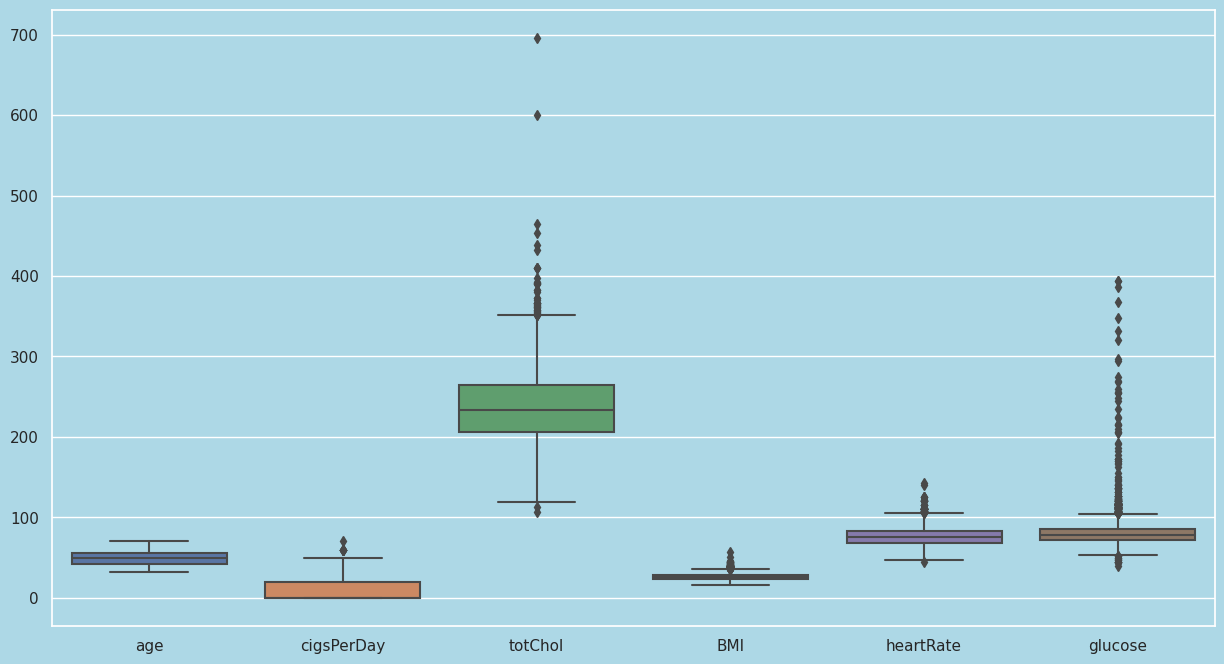

In [37]:
# visualization of continuous features through box plot.
plt.figure(figsize = (15,8))
sns.boxplot(data = data[['age', 'cigsPerDay', 'totChol','BMI', 'heartRate', 'glucose']])

###I picked boxplot here beacuse it gives the better  visualization to see the distribution of continuous features.

###Through the graph we can say that some outliers present in the data. But we are not going to treat the outliers here because for example if some patient has the highest heart rate or total cholestrol then obviously they are prone to CHD. If we'll remove those outliers then the model will not be able to predict with best accuracy.

In [38]:
# function to plot the distribution of numerical columns.
def dist_plotting(columns):
  ''' Returns subplots of histograms using seaborn '''
  sns.set(rc={'axes.facecolor':'pink', 'figure.facecolor':'pink'})
  fig, axes = plt.subplots(len(columns) , figsize=(18,40))

  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.histplot(ax = axes[i], x = data[column], kde = True)

In [39]:
# numerical columns.
numeric_col = ['age','cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

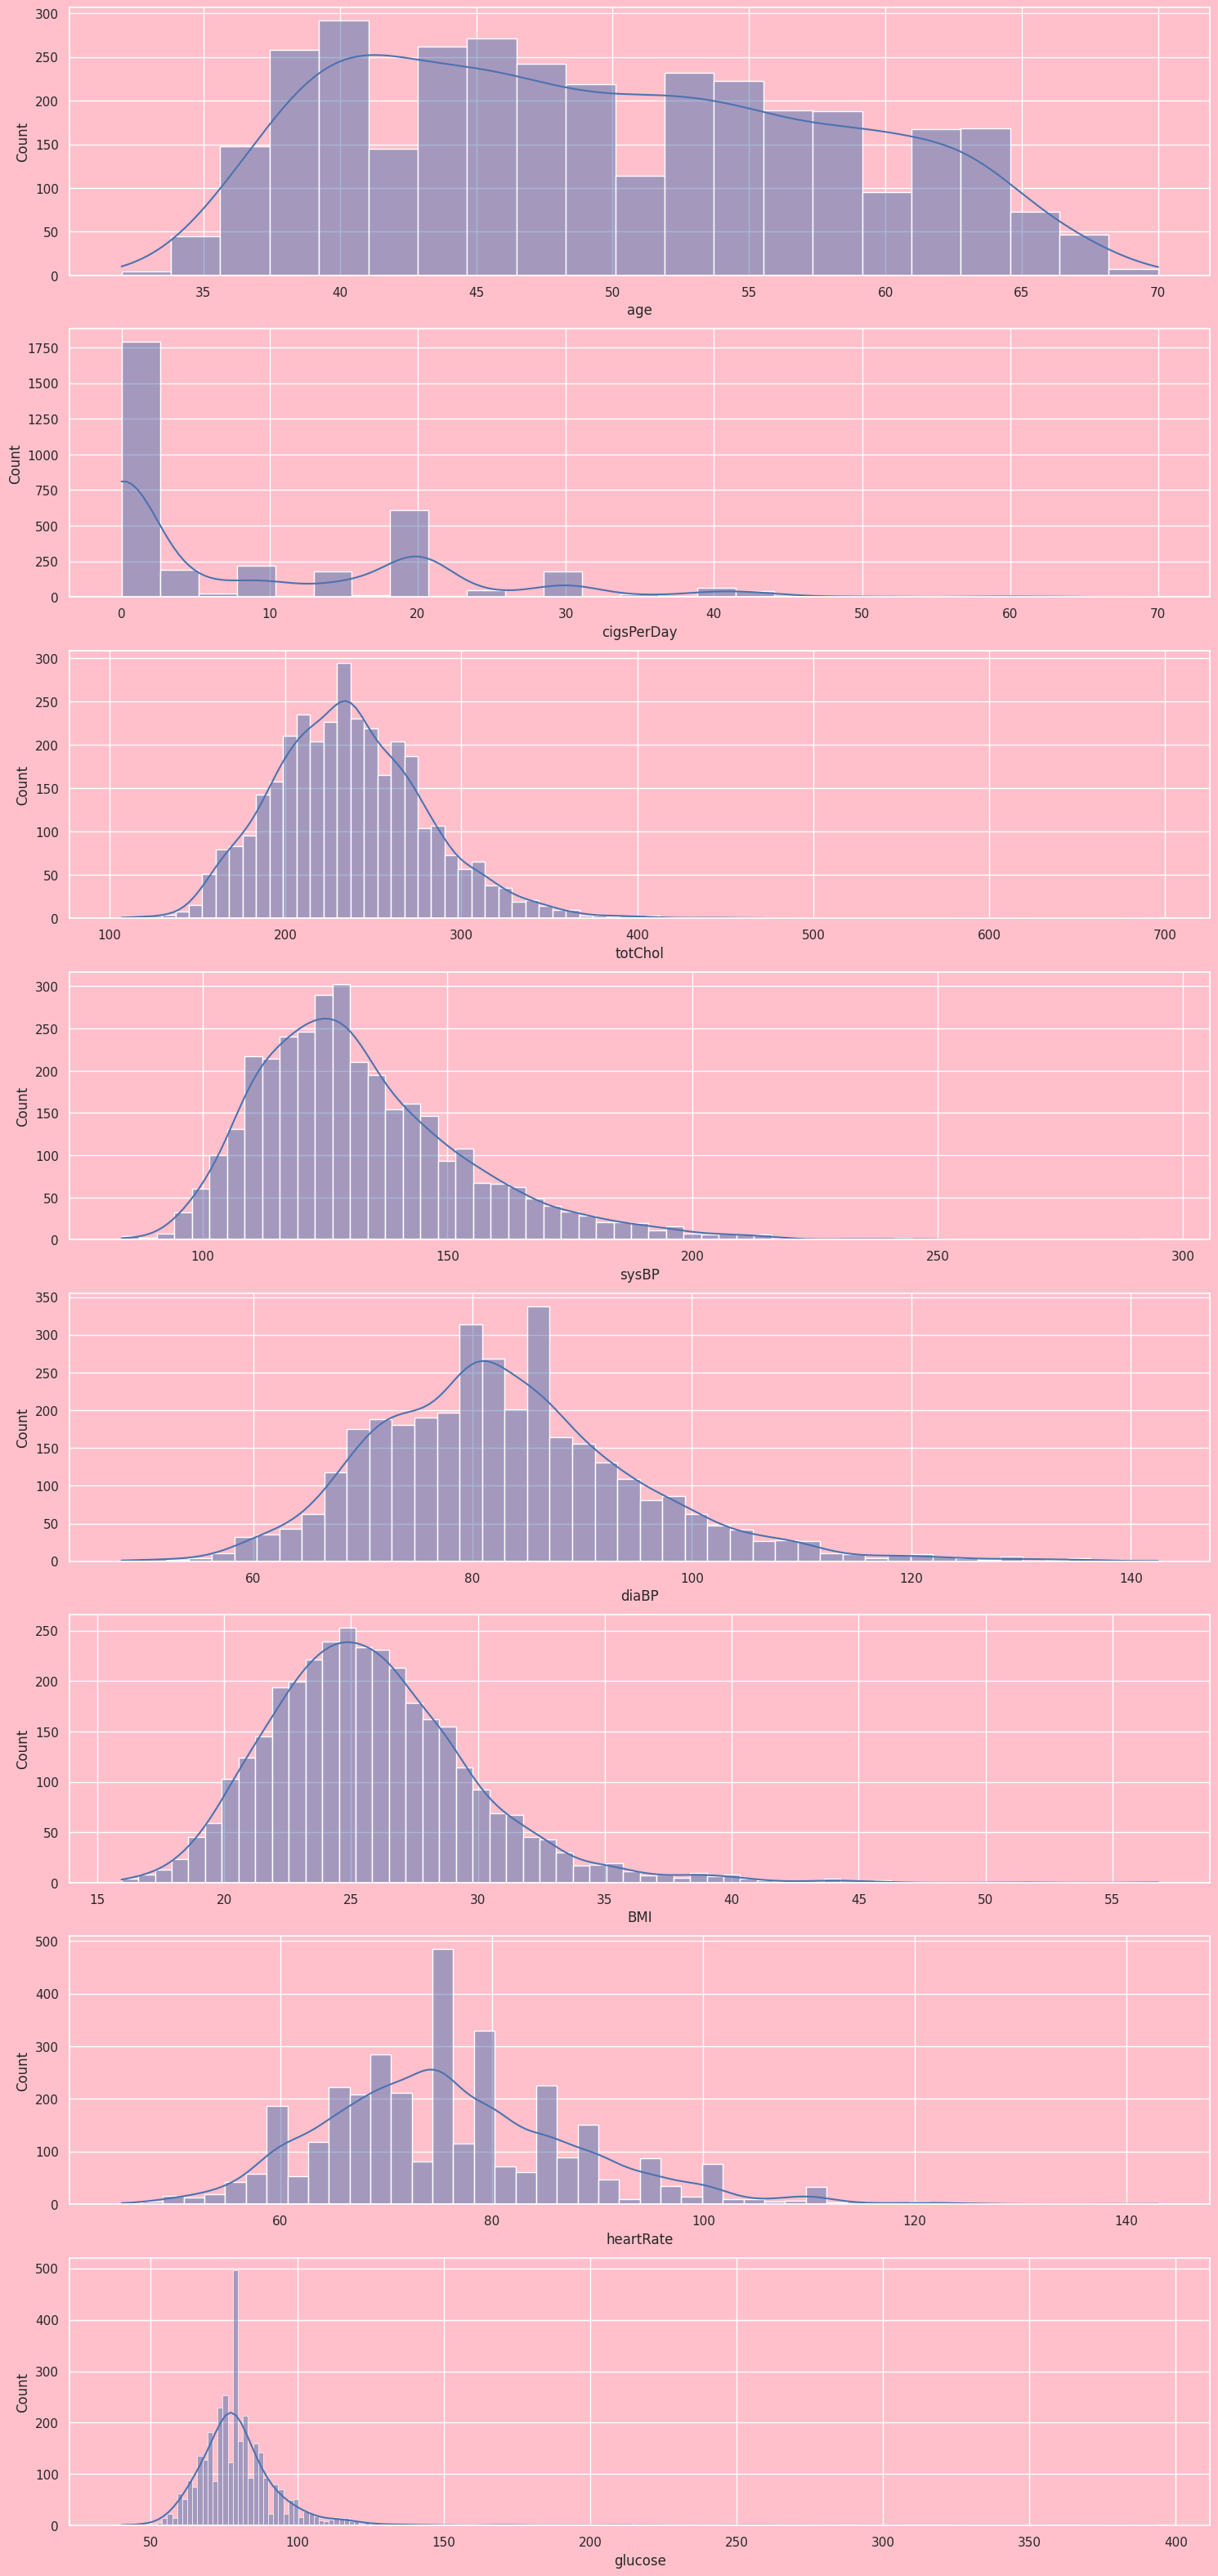

In [40]:
# plotting the numerical columns.
dist_plotting(numeric_col)

### I picked histogram here because a histogram is an approximate representation of the distribution of numerical data. And here i wanted to see the distribution or range of each numerical features.

### As seen from the above histograms, we can understand that :

*   Age ranges from 35 years to 70 years and is almost normally distributed, with most people belonging to an age group of 40.
*   Cigarettes smoked per day on an average are mainly 0, but 20 cigarettes a day are also prevalent.
*   Cholestrol ranges form 100 to 700, with most belonging to 150 to 350.
*   Systolic BP ranges mainly from 100 to 200.
*   Diastolic BP ranges mainly from 60 to 120.
*   BMI ranges mainly from 16 to 40.
*   Heart rate ranges from 40 to 110 and most occurances are around 75.
*   Glucose ranges mainly from 50 to 125, rest seem like outliers with extreme numbers but cannot be ignored as these numbers can cause risk of heart disease.

### We can understand from the data that, it has wide range of numbers, which indicates that both healthy and unhealthy people are considered. To get a clear understanding of risk of heart disease all these categories play an important role, especially those which are on the higher end as these extreme numbers may make a person more vulnerable to heart disease.




##**Bivariate Analysis**

In [41]:
# categorical features.
cat_features = ['education', 'sex', 'is_smoking', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

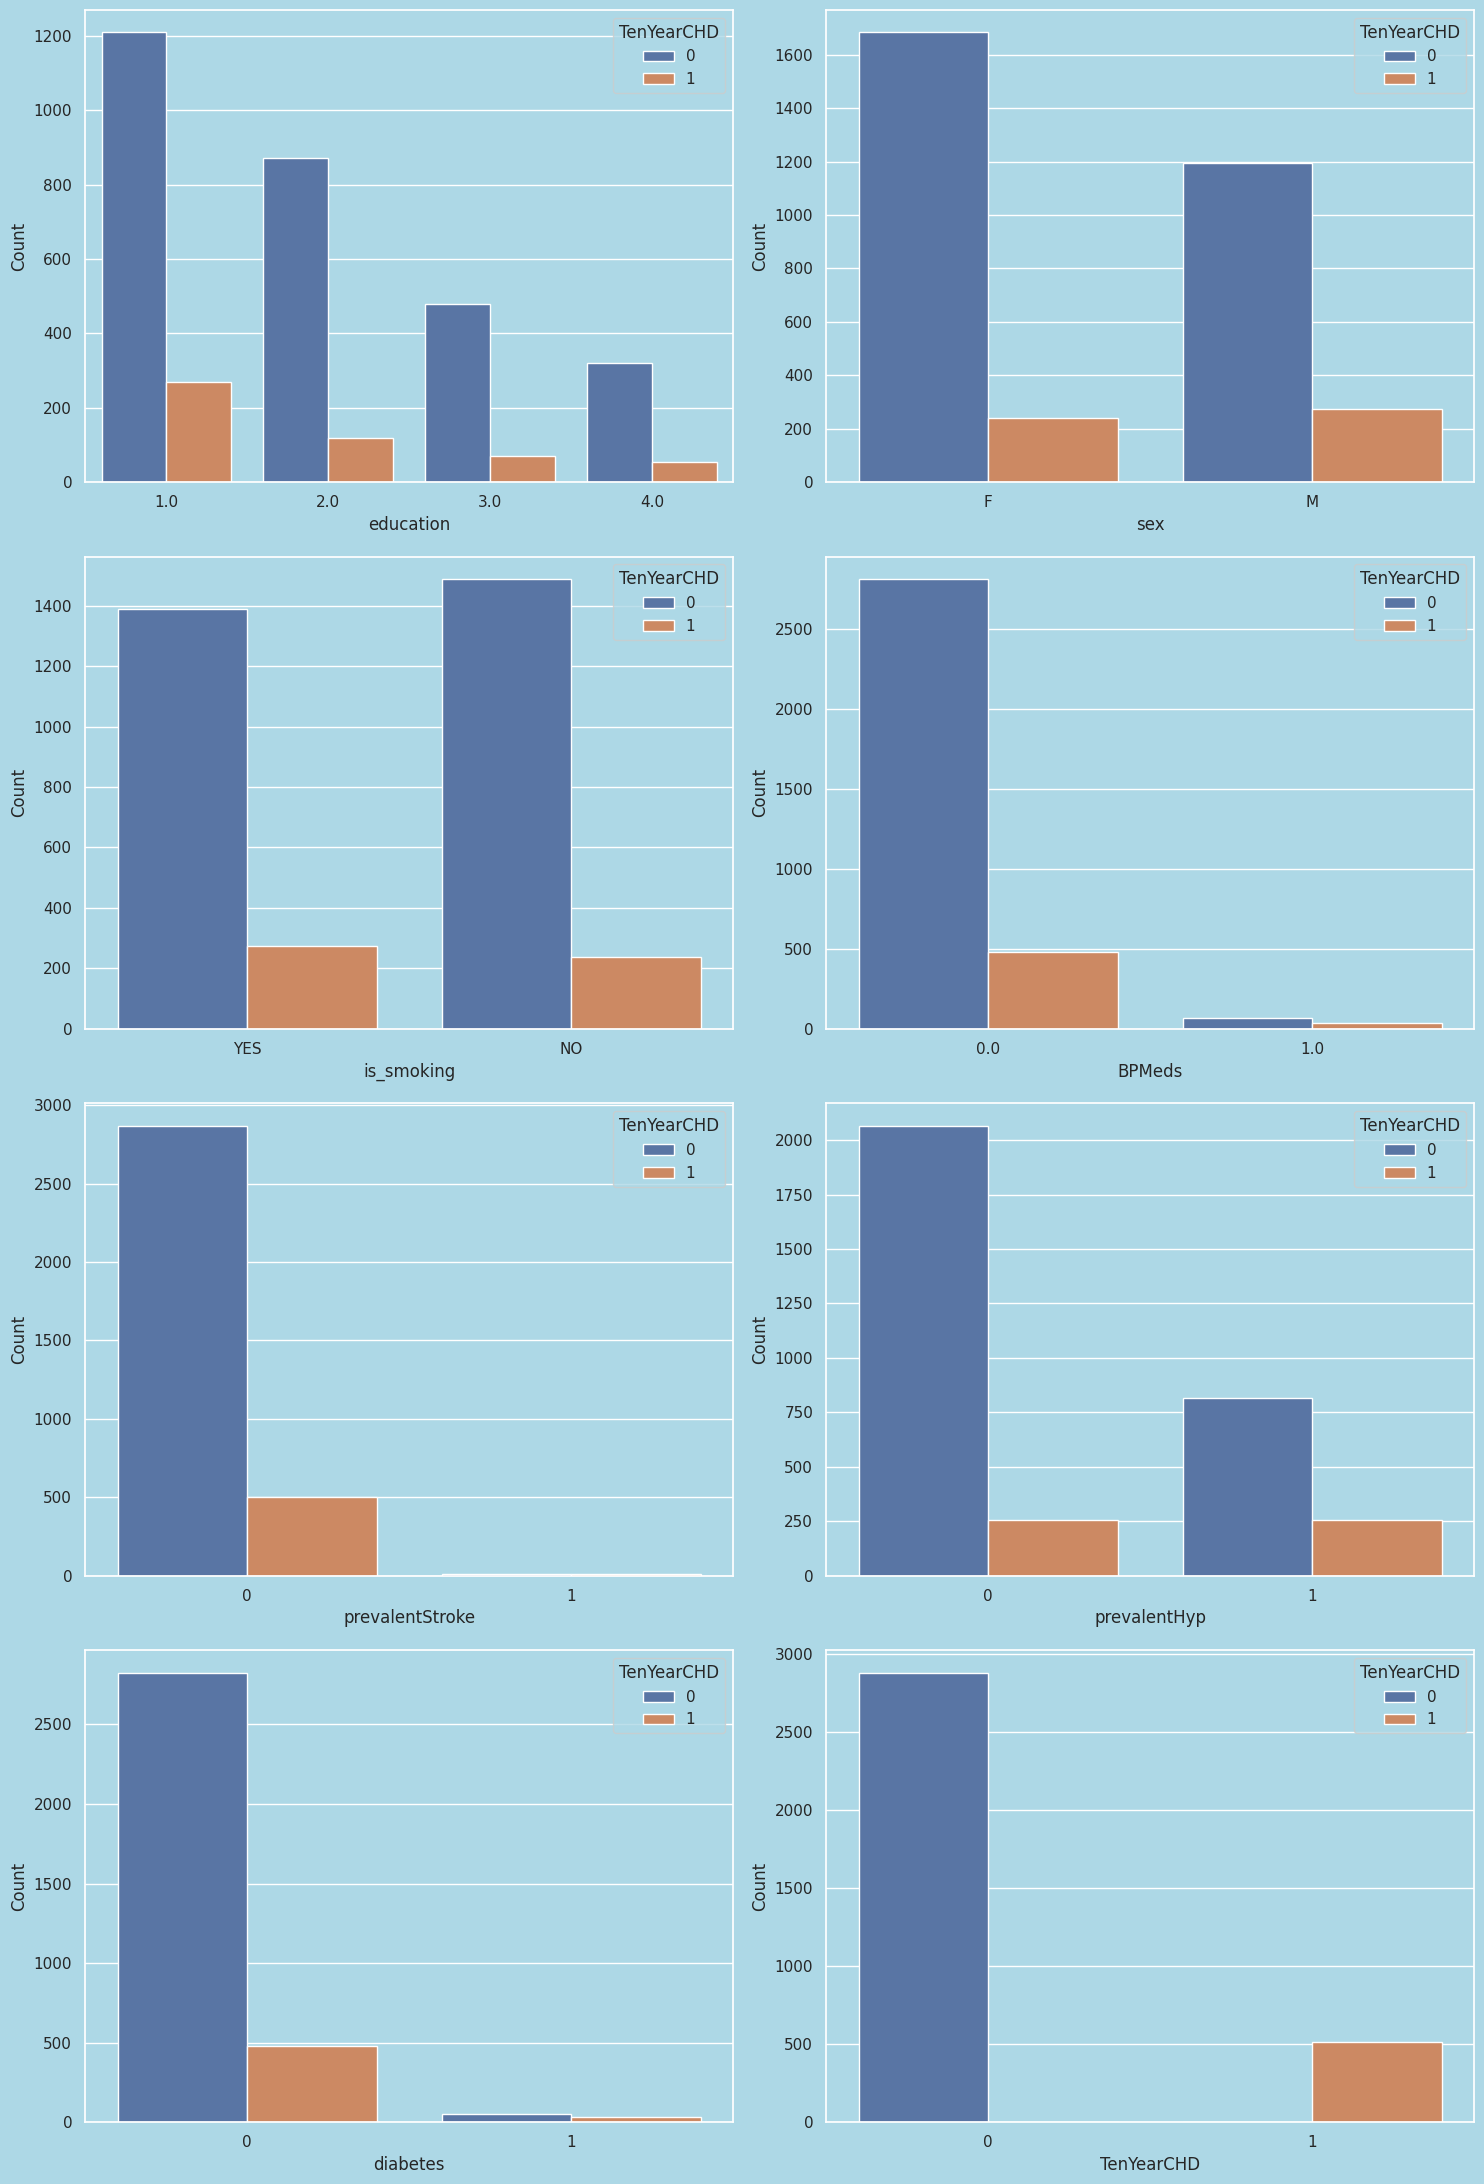

In [42]:
sns.set(rc={'axes.facecolor': 'lightblue', 'figure.facecolor': 'lightblue'})
plt.figure(figsize=(15, 22))

for i, feature in enumerate(cat_features):
    plt.subplot(4, 2, i + 1)
    sns.countplot(x=feature, hue='TenYearCHD', data=data)
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### I chose the count plot here because I wanted to see the count of each class with respect to the target variable.

###**Insights found :-**

* Patients that belong to class 1 education is having the highest risk of CHD. As the class increases the risk decreases.
* Males is having a slightly high risk as compared to females.
* patients who smoke is having a bit more risk as compared to non-smokers.
* Patient who is not having BPMeds is at high risk.
* Patient who does not have a history of stroke are at high risk.
* Patients who do not have diabetes are at high risk.

### This is only one on one visualization of the columns with the target variable. There are various factors that decide the risk of CHD after ten years. Like age, cigarettes per day, diabetes, heart rate, cholesterol level, glucose, etc.

In [43]:
# continuous features.
conti_feat_df = data[['age','cigsPerDay', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

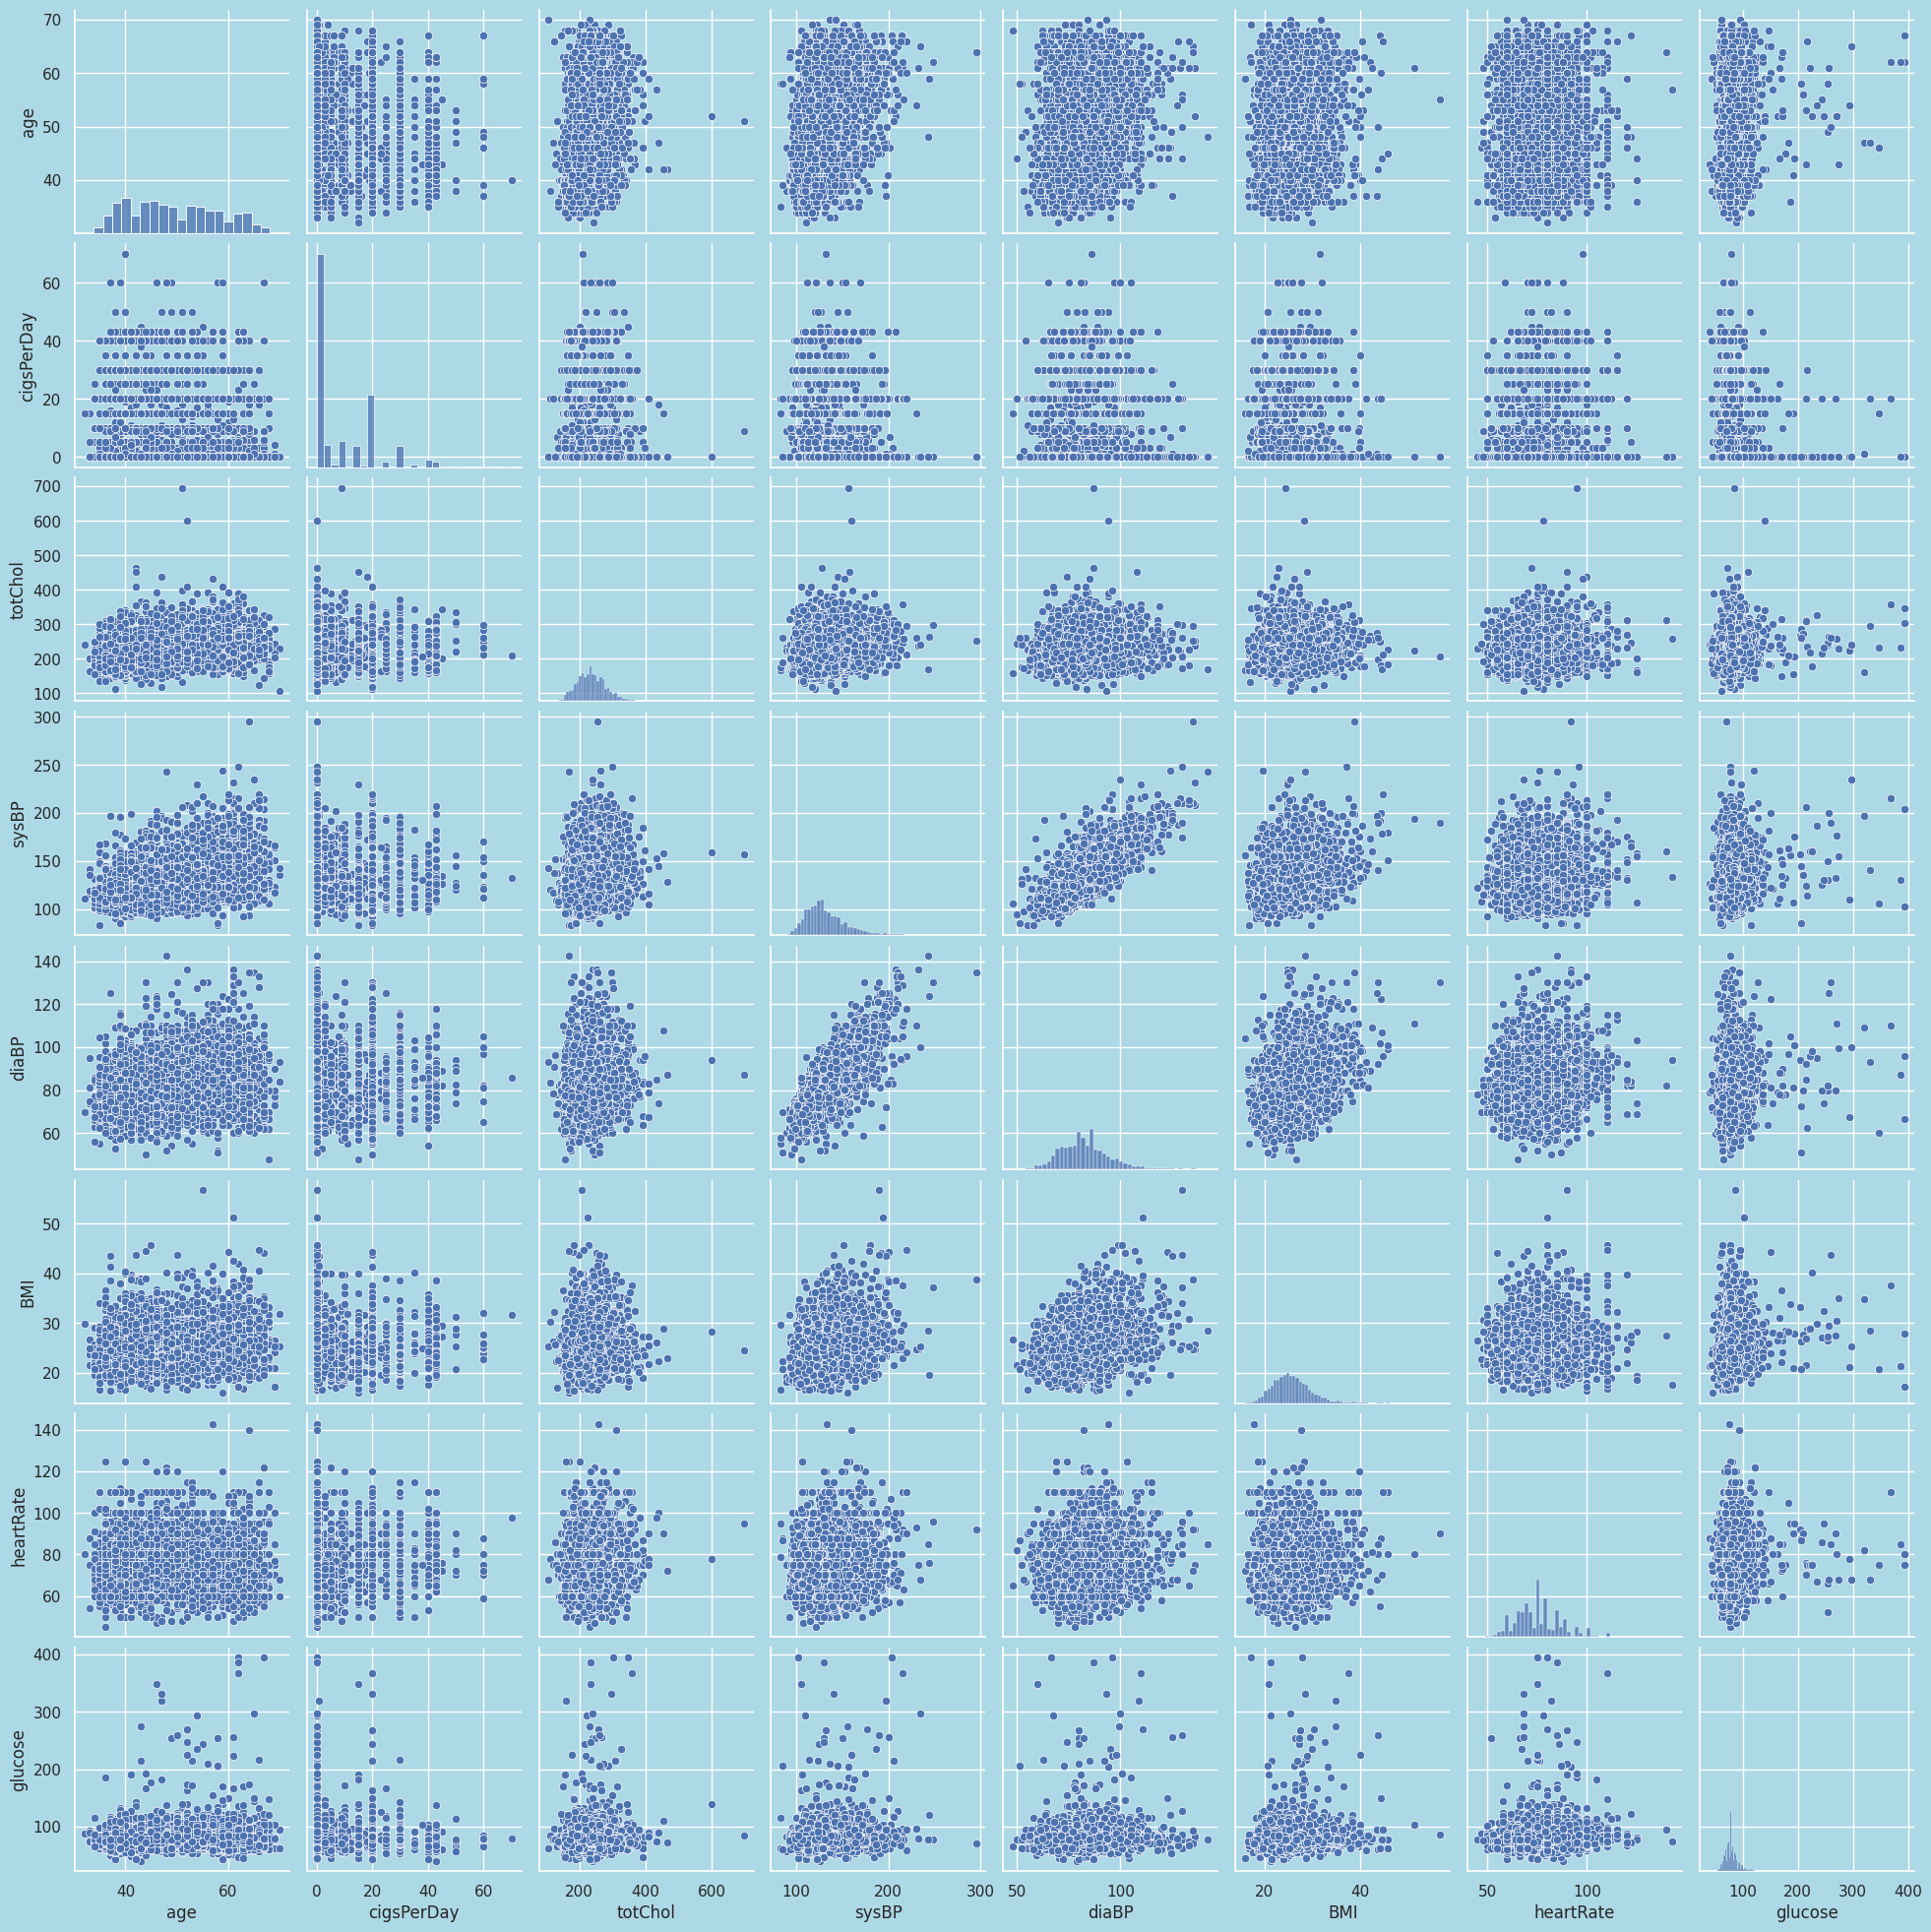

In [44]:
# Visualization of continuous features through pairplot.
sns.pairplot(conti_feat_df)
plt.show()

### I used pairplot here because i wanted to see the best set of features and relationship between two or more variables.

### The above Pairplot explains bivariate analysis for all the numerical columns, we can understand that:

*   As cholestrol is low the systolic BP also remains low.
*   Systolic BP and diastolic BP have a positive relationship.
*   Most of the cases, less cholestrol means less glucose.
*   Diastolic BP, systolic BP and BMI have a slight positive relationship.

##**Correlation.**

<Axes: >

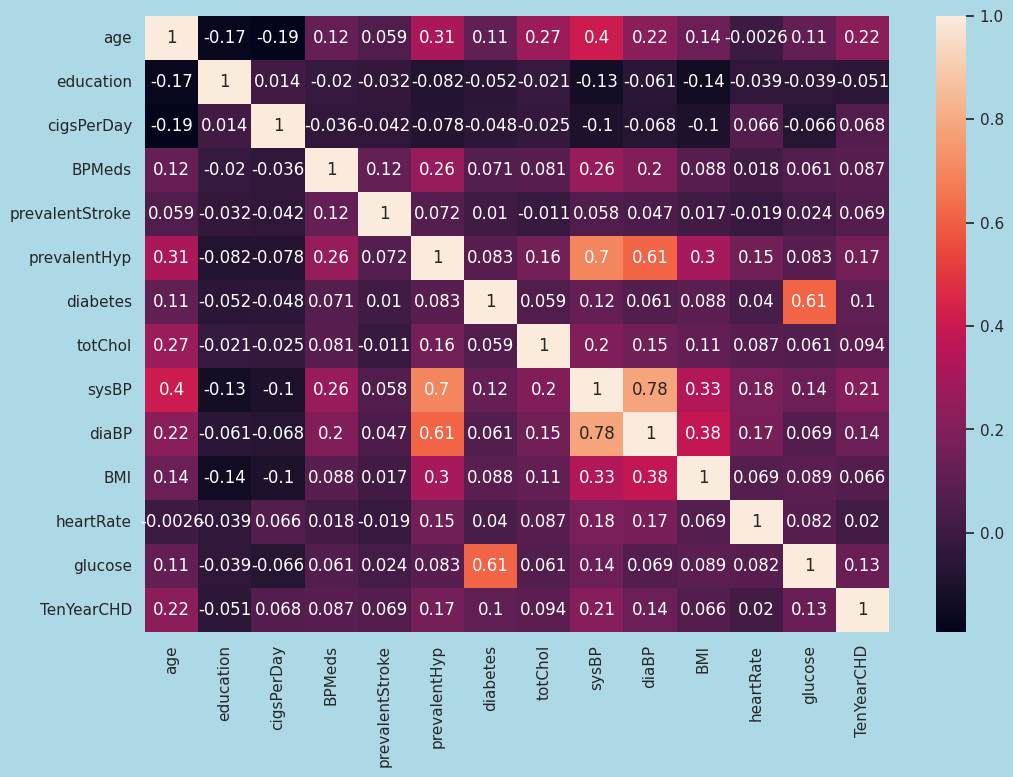

In [45]:
#  checking the correlation among features through heatmap.
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True)

###The insights that I have got from the above correlation heatmap are:-

* diabetes and glucose show a very high correlation among them. The reason behind that is Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high.

* sysBP and diaBP show a high correlation among them. And both also show a high correlation with prevalenthyp.

* cigarettes per day and heart rate show some negative correlation with age.

#**Feature Engineering**

###**Note :-** I am not going to deal with outliers because it's healthcare data. Removing outliers from this data will lead us to lose some valuable or very important information that can deteriorate my ml model predictions. For example, if the patient has a very high heart rate that means the patient is prone to CHD. For the same reason, i am also not going to deal with multicollinearity because dropping any column would be very costly.

### We can make a new column pulse pressure here because the top number (systolic) minus the bottom number (diastolic) is the pulse pressure. It'll help me to reduce the column also it deals with the correlation among them.

In [46]:
# making a new column pulse pressure.
data['pulse_pressure']=data['sysBP'] - data['diaBP']

###I am going to drop both columns, apart from that i'll also drop is_smoking column because we can get the same information from number of cigrattes per day. Where 0 means "NO" and more than 0 means "Yes" and we are also getting how many they are smoking per day.

In [47]:
# Droping the column sysBP and diaBP.
data.drop(['sysBP', 'diaBP', 'is_smoking'], axis = 1, inplace = True)

##Categorical Encoding.

In [48]:
# encoding the sex column.
data = pd.get_dummies(data, columns = ['sex'])

In [49]:
data.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulse_pressure', 'sex_F', 'sex_M'],
      dtype='object')

## Handling class imbalance.

In [50]:
# value counts of target variable.
data['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

### I can see here that it is a high-imbalance dataset. In an imbalanced dataset, the prediction of the machine learning model will be biased. To overcome this problem we have multiple methods but I am going to do that through SMOTE. This technique generates synthetic data for the minority class.

In [51]:
# Importing library for handling imbalance data.
from imblearn.over_sampling import SMOTE

# istance for smote.
smote = SMOTE()

# separating the predictor and target variable
independent_variables =['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulse_pressure', 'sex_F', 'sex_M']

dependent_variable = 'TenYearCHD'
X = data.loc[:, independent_variables]
y = data[dependent_variable]

# earlier shape of x and y.
print(f'shape of X:{X.shape}')
print(f'shape of y: {y.shape}')

# over sampling the minority class through smote.
X,y = smote.fit_resample(X,y)

# shape after over sampling.
print(f'shape of X after over sampling:{X.shape}')
print(f'shape of y after over sampling: {y.shape}')

shape of X:(3390, 14)
shape of y: (3390,)
shape of X after over sampling:(5758, 14)
shape of y after over sampling: (5758,)


In [52]:
# Counts of each classes after oversampling
print(list(y).count(1))
print(list(y).count(0))

2879
2879


### Data Preprocessing.

In [53]:
# checking the range of dependent and independent variable.
ind_var = X.columns
data[ind_var].describe().loc[['min', 'max']]

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,pulse_pressure,sex_F,sex_M
min,32.0,1.0,0.0,0.0,0.0,0.0,0.0,107.0,15.96,45.0,40.0,15.0,0.0,0.0
max,70.0,4.0,70.0,1.0,1.0,1.0,1.0,696.0,56.80,143.0,394.0,160.0,1.0,1.0


In [54]:
# scaling the independent features.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Data Splitting.

In [55]:
# splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.25, random_state = 10)

#**ML Model Implementation.**

In [56]:
# model dict.
models = [
          ['Logistic Regression: ',               LogisticRegression()],
          ['Random Forest Classifier: ',          RandomForestClassifier()],
          ['XGB Classifier: ',                    XGBClassifier()],
          ['Support Vector Classifier: ',                  SVC()],
          ['K Nearest Neighbor: ',                 KNeighborsClassifier()]
]



In [57]:
# fitting the model.
import time
model_data = []

for name, model in models :
  model_data_dic = {}
  model_data_dic["Name"] = name
  start = time.time()

  model.fit(X_train, y_train)
  end = time.time()
  y_pred = model.predict(X_test)

  # model training time.
  model_data_dic["Train_Time"] = end - start

  # model evaluation.

     # precision score.
  model_data_dic["Train_Precision"] = precision_score(y_train, model.predict(X_train))
  model_data_dic["Test_Precision"] = precision_score(y_test, y_pred)

     # recall score.
  model_data_dic["Train_Recall"] = recall_score(y_train, model.predict(X_train))
  model_data_dic["Test_Recall"] = recall_score(y_test, y_pred)

     # roc_auc score
  model_data_dic["Train_roc_auc"] = roc_auc_score(y_train, model.predict(X_train))
  model_data_dic["Test_roc_auc"] = roc_auc_score(y_test, y_pred)

  # appending the model data.
  model_data.append(model_data_dic)

# Training set.
Train_Accuracy = accuracy_score(y_train, model.predict(X_train))
print(f'The accuracy on training dataset is: {Train_Accuracy}')
    # Validation set.
Test_Accuracy = accuracy_score(y_test, y_pred)
print(f'The accuracy on testing dataset is: {Test_Accuracy}')

# converting list to dataframe.
df = pd.DataFrame(model_data)

The accuracy on training dataset is: 0.8779527559055118
The accuracy on testing dataset is: 0.8222222222222222


In [58]:
# model with their accuracy score.
df.reset_index(drop = True)

,Name,Train_Time,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_roc_auc,Test_roc_auc
0,Logistic Regression:,0.069721,0.790032,0.751603,0.684743,0.667141,0.749934,0.728414
1,Random Forest Classifier:,0.740938,1.000000,0.919162,1.000000,0.873400,1.000000,0.900065
2,XGB Classifier:,0.888508,0.999539,0.913313,0.995404,0.839260,0.997469,0.881638
3,Support Vector Classifier:,0.668208,0.842980,0.801406,0.676011,0.648649,0.774047,0.747662
4,K Nearest Neighbor:,0.013679,0.864018,0.802436,0.899357,0.843528,0.877783,0.822714


###From the model building section we can understand the best models are Random Forest and XGB Classifier. Between these two, Random Forest is overfitting to some extent but performs well on test data as well, compared to other models. Hence, we will try and improve the performance of the Random Forest model with hyperparameter tuning.

#**Final Model**

In [59]:
# final model.
rf_clf = RandomForestClassifier() # model instance
rf_clf.fit(X_train, y_train)      # fitting the model
rf_y_pred = rf_clf.predict(X_test)   # y prediction

### Performence evaluation.

Random Forest Classifier
Accuracy Score: 0.9041666666666667
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       737
           1       0.92      0.88      0.90       703

    accuracy                           0.90      1440
   macro avg       0.91      0.90      0.90      1440
weighted avg       0.91      0.90      0.90      1440


 Confusion matrix for test set:
[[686  51]
 [ 87 616]]
********************


[Text(0, 0.5, 'NO'), Text(0, 1.5, 'YES')]

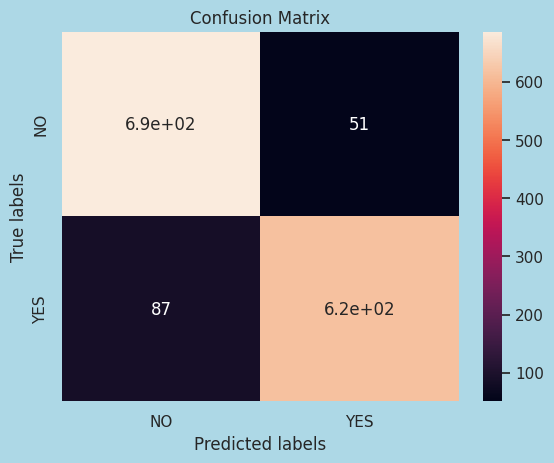

In [60]:
# function for model evaluation
accuracy = accuracy_score(y_test, rf_y_pred)
print('Random Forest Classifier')
print('Accuracy Score:',accuracy)
print(classification_report(y_test, rf_y_pred))
print("\n Confusion matrix for test set:")

labels = ['NO', 'YES']
cm = confusion_matrix(y_test, rf_y_pred)
print(cm)

print('**'*10)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#**Cross Validation And Hyperparameter Tuning**




###For this case the recall score becomes very important as we would want less false negative numbers. Which basically predicts that a person does not have risk of heart disease when he actually does. Hence, that is another reason of choosing random forest as a model.

In [61]:
# hyperparameter tuning.
classifier = RandomForestClassifier()

# Hyperparameter dictionary
grid_values ={'n_estimators' : [160,180,200],
                'max_depth': [10,11,12,13],
                'min_samples_split': [2,3,4]}

rf_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'recall', cv=5)

# Fitting the object to train dataset
rf_classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 11, 12, 13],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [160, 180, 200]},
             scoring='recall')

In [62]:
# Getting the best hyperparameters.
print("Best Hyperparameters:", rf_classifier.best_params_)

Best Hyperparameters: {'max_depth': 13, 'min_samples_split': 2, 'n_estimators': 160}


In [63]:
# fiting best hyperparameter to the Random Forest classifier model.
grid_rf_clf = RandomForestClassifier(**rf_classifier.best_params_)
grid_rf_clf.fit(X_train, y_train)
grid_y_pred = grid_rf_clf.predict(X_test)

# model evaluation.
clf_report = classification_report(y_test, grid_y_pred)
print(clf_report)

print('**'*20)

print('Confusion matrix of training dataset.')

grid_train = grid_rf_clf.predict(X_train)
print(confusion_matrix(y_train, grid_train))

print('**'*20)

print('Confusion matrix of testing dataset.')

print(confusion_matrix(y_test, grid_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       737
           1       0.90      0.86      0.88       703

    accuracy                           0.88      1440
   macro avg       0.88      0.88      0.88      1440
weighted avg       0.88      0.88      0.88      1440

****************************************
Confusion matrix of training dataset.
[[2124   18]
 [  21 2155]]
****************************************
Confusion matrix of testing dataset.
[[669  68]
 [ 99 604]]


In [64]:
# accuracy score.
grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train roc_auc', 'Test roc_auc'])

# model name.
name = 'Random Forest Classifier'

# Train and test accuracy score.
train_accuracy = accuracy_score(y_train, grid_train)
test_accuracy = accuracy_score(y_test, grid_y_pred)

# train and test precision score.
train_precision = precision_score(y_train, grid_train)
test_precision= precision_score(y_test, grid_y_pred)

# train and test recall score.
train_recall = recall_score(y_train, grid_train)
test_recall = recall_score(y_test, grid_y_pred)

# train and test roc_auc score.
train_roc_auc = roc_auc_score(y_train, grid_train)
test_roc_auc = roc_auc_score(y_test, grid_y_pred)

grid_df = grid_df.append({'Model': name,
                           'Train Accuracy': train_accuracy,
                           'Test Accuracy': test_accuracy,
                           'Train Precision': train_precision,
                           'Test Precision': test_precision,
                           'Train Recall': train_recall,
                           'Test Recall': test_recall,
                           'Train roc_auc': train_roc_auc,
                           'Test roc_auc': test_roc_auc},
                           ignore_index = True)

pd.DataFrame(grid_df)

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train roc_auc,Test roc_auc
0,Random Forest Classifier,0.990968,0.884028,0.991717,0.89881,0.990349,0.859175,0.990973,0.883455


### As we can see there is not that much impact of hyperparameter tuning on the modle, overfitting has been reduced while maintaining the scores derived from the base model.

###SHAP will help increase model explainability and enchance our predictions

In [65]:
# installing shap.
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 6.7 MB/s eta 0:00:00


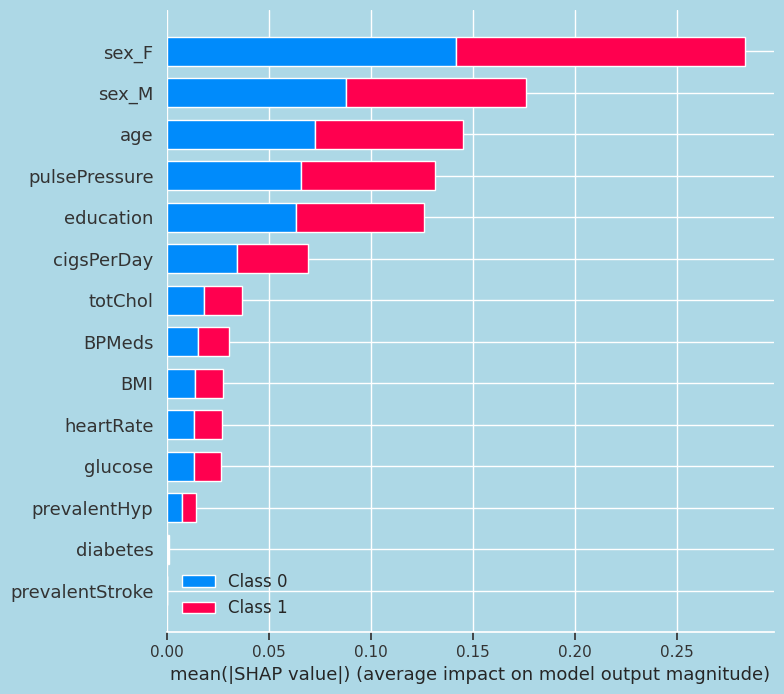

In [66]:
# Importing SHAP
import shap

# Creating instances of shap
explainer = shap.TreeExplainer(grid_rf_clf)
shap_values = explainer.shap_values(X_test)

# converting x test into a dataframe.
shap_df = pd.DataFrame(X_test, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_F', 'sex_M'])

# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

### According to shap female and male are the most important features, followed by age, education, pulse pressure, cigarettes per day, total cholesterol, and so on.

#**Conclusion**

### I did a lot of work on this project, let me summarise it.
* ### Data loading:- Mounted drive to load the CSV file and read it through pd.read_csv.
* ### Data cleaning:- In this section, I cleaned the data by filling the null values through median and mode. I filled the education and BPMeds column through mode because it is nominal data. I also filled cigsPerDay, totChol, BMI, heartRate, glucose through the median. Because these all are continuous variables and filling it through the mean can affect the model. Because the mean is always affected by outliers.


* ### EDA :- Performed it to get some useful insights.


* ### Feature engineering:- Made a new column pulse pressure from sysBP and diaBP by doing subtraction within them. Then I did categorical encoding on the sex column. Handled the imbalance dataset to get an unbiased model and at last, I scaled the feature.

###**Model Implemented**

* ### Logistic Regression
* ### XGB Classifier
* ### Random Forest Classifier
* ### K Nearest Neighbor
* ### Support Vector Classifier

###**Model Selected**

* ### Random Forest Classifier:- The reason behind it is that it was performing very well with hyperparameter tuning as compared to all other models. I tuned it via grid search cv with recall scoring because grid search is very good when it comes to doing cross-validation on smaller datasets. I chose recall as scoring because it is health care data where we can't bear more false negative numbers.


### The final results of the model are almost close to the base model and we have achieved almost 90% test accuracy and test precision, and test roc_auc score where as we have achieved almost 88% test recall.



### At the end of the project I did a model explanation in which I got the feature importance according to SHAP. As per SHAP I got the sex, age, education, pulse pressure, and cigarettes per day were four main influencers.



### Other methods or models could be used to further improve the model. With the help of a medical expert, we could engineer more features which would in turn help improve the model further.